# 导入库

In [220]:
import pandas as pd
import numpy as np
from IPython.display import display # 使得我们可以对DataFrame使用display()函数
import seaborn as sns
import matplotlib.pyplot as plt

# 设置以内联的形式显示matplotlib绘制的图片（在notebook中显示更美观）
%matplotlib inline

df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

'''
分类问题：监督学习，二分类
'''

print df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# 数据预处理

In [221]:
## 【空值处理】-判断一个数是否是NaN
#np.isnan()

## 【空值处理】判断是否为空
#   df.isnull()

## pandas填充空值，fillna
df.fillna({'Age': df.loc[:,'Age'].mean(), 'Fare':df.loc[:,'Fare'].mean()}, inplace=True )
df2.fillna(df2.loc[:,'Age'].mean(), inplace = True)

# Which features contain blank, null or empty values?

# These will require correcting.

# Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
# Cabin > Age are incomplete in case of test dataset.

# print df.columns
# print df.info()  # 数据类型，type
# print df.describe()            # 数值特征的分布
print df.describe(include=['O']) # 分类特征的分布
print df.columns

                             Name   Sex    Ticket        Cabin Embarked
count                         891   891       891          204      889
unique                        891     2       681          147        3
top     Graham, Mr. George Edward  male  CA. 2343  C23 C25 C27        S
freq                            1   577         7            4      644
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


# 探索性数据分析

In [222]:
## 0.1 基于【数据分析】的 假设
## 特征跟最后结果【相关性】的人工经验 假设

'''
1、可能相关特征：Age， Embarked， Pclass
2、可能丢弃的特征：
Ticket：重复率相对较高：210/891 = 22% |  可能与存活无关
Cabin：包含很多空值
PassengerID：序号
Name：不是相对的衡量标准，对存活情况可能无关，丢弃
3、特征转换：
Why：指标评估 + 可解释性 + 场景
家庭成员特征:   SibSp + Parch，人工经验，组合父母和兄弟
Name：       Title有效特征
年龄特征：    数值特征转化为类别特征
费用特征：    数值特征转化为类别特征

4、假设：
女性，小孩，头等舱生存更可能生存
'''

## 0.2 快速验证 验证1：Pclass
# 验证方法：Groupby后获取每个分组的平均值，即得到生存率。生存人数 / 总人数
# DataFrame 排序df.sort_values(by = 列名，,ascending)
display(df[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values( by = 'Survived', ascending = False))

# 说明Pclass特征与生存相关

# 验证2：Sex
display(df[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False))

display(df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))

display(df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


,Sex,Survived
0,female,0.742038
1,male,0.188908


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


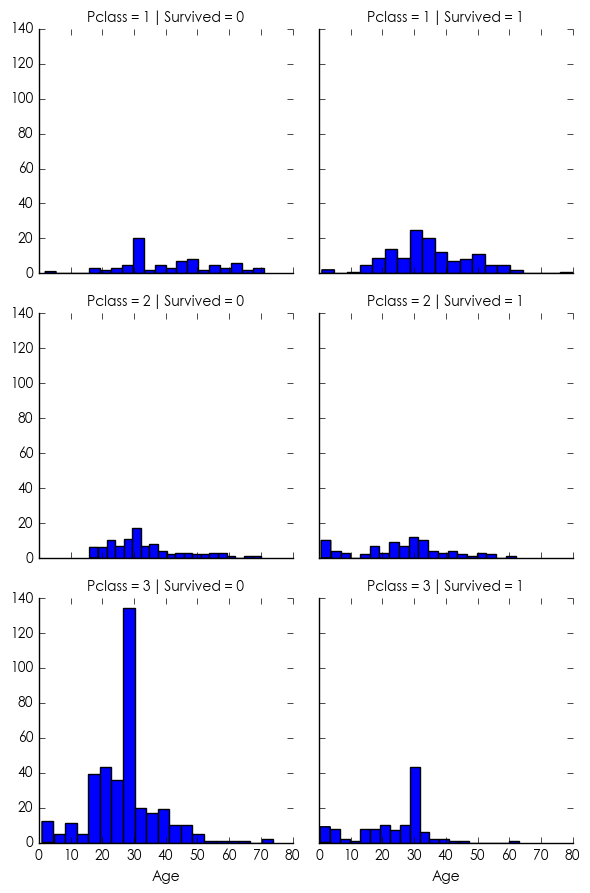

In [223]:
'''

1、seaborn特征观察画图，验证，控制变量
'''

# 自己画
# bins1 = np.arange(0, df['Age'].max() + 10, 10)      ## 直方图横轴的范围
# sns.distplot(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'], color='green', kde= False, bins=bins1)
# sns.distplot(df[df['Sex'] == 'male']['Age'], color='red', kde= False, bins= bins1)

# Kaggle Kernel 格子绘图，数值型
# g = sns.FacetGrid(df, col='Survived')
# g.map(plt.hist, 'Age', bins = 20)      # bins间隔

# 格子绘图，两个条件，数值型
grid = sns.FacetGrid(df, col = 'Survived', row = 'Pclass')
grid.map(plt.hist, 'Age', bins = 20)

# 格子绘图，分类型特征 【待】
# gird = sns.FacetGrid(df, row = 'Survived', size=2.2, aspect=1.6)
# grid.map(sns.pointplot, 'Pclass', 'Sex', palette = 'deep')
# grid.add_legend()

# 格子绘图，分类 + 数值型特征【待】

In [224]:

'''
1.1.0 去除所观察的无用特征列 
'''
# labels_train = df['Survived']
# features_train = df.drop('Survived', 1)
# features_train = df.drop('Name', 1)

# features_test = df2.drop('Name', 1)

# 1.1 探索，确定特征
# features = ['Pclass', 'Age', 'Sex', 'Fare', 'Embarked', 'Name', 'SibSp', 'Parch']
# print df.head(2)
# features_train = df.loc[:,features]
# labels_train = df.loc[:,'Survived']
# features_test = df2.loc[:,features]

features_train = df.drop( ['Ticket', 'Cabin'], axis=1)
labels_train = df.loc[:, 'Survived']
features_test = df2.drop( ['Ticket', 'Cabin'], axis=1)
print features_train.loc[:, ['Survived', 'Name']]

# 后续创建新特征等极大可能将train 和 test 一起操作，故combine
combine = [features_train, features_test]

     Survived                                               Name
0           0                            Braund, Mr. Owen Harris
1           1  Cumings, Mrs. John Bradley (Florence Briggs Th...
2           1                             Heikkinen, Miss. Laina
3           1       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4           0                           Allen, Mr. William Henry
5           0                                   Moran, Mr. James
6           0                            McCarthy, Mr. Timothy J
7           0                     Palsson, Master. Gosta Leonard
8           1  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9           1                Nasser, Mrs. Nicholas (Adele Achem)
10          1                    Sandstrom, Miss. Marguerite Rut
11          1                           Bonnell, Miss. Elizabeth
12          0                     Saundercock, Mr. William Henry
13          0                        Andersson, Mr. Anders Johan
14          0            

In [225]:
'''
1.1.1 从已有特征中派生新特征

姓名 - 姓名数据中提取有用的信息, Mr, Miss, Mrs

Observations.

When we plot Title, Age, and Survived, we note the following observations.

Most titles band Age groups accurately:. For example: Master title has Age mean of 5 years.
Survival among Title Age bands varies slightly.
Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).
'''

# 验证

for dataset in combine:
    dataset['title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

## pandas 交叉表和透视表 https://blog.csdn.net/bqw18744018044/article/details/80015840

pd.crosstab( features_train['title'], features_train['Sex'])

# 与性别特征相关为啥不去掉？ 因为Master？大部分是男性，又是小孩？ 【待】

# 初步验证成功。分类，人工经验，其他 -> Rare

for dataset in combine:
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir',\
                                                 'Jonkheer', 'Dona'], 'Rare')

    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
    
# 新特征与目标相关性验证

print features_train[ ['Survived', 'title'] ].groupby('title').mean().sort_values(by = 'Survived', ascending = False)

# 分类 -> 值 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['title'] = dataset['title'].map(title_mapping)   # 分类.map -> 值
    dataset['title'] = dataset['title'].fillna(0)
    # dataset = dataset.drop( ['Name'], axis=1)              # 直接给dataset赋值并不会改变？【待】
    dataset.drop( ['Name'], axis=1, inplace=True)            

# drop name
# drop 返回drop后的df，但不会改变原来的df
# features_train.drop( ['Pclass'], axis=1)


        Survived
title           
Mrs     0.793651
Miss    0.702703
Master  0.575000
Rare    0.347826
Mr      0.156673


In [226]:
# 转换类别特征 
for dataset in combine:
     dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
        
features_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,3
2,3,1,3,1,26.0,0,0,7.9250,S,2
3,4,1,1,1,35.0,1,0,53.1000,S,3
4,5,0,3,0,35.0,0,0,8.0500,S,1


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,0,22,1,0,7.2500,S,1
1,2,1,1,1,38,1,0,71.2833,C,3
2,3,1,3,1,26,0,0,7.9250,S,2
3,4,1,1,1,35,1,0,53.1000,S,3
4,5,0,3,0,35,0,0,8.0500,S,1


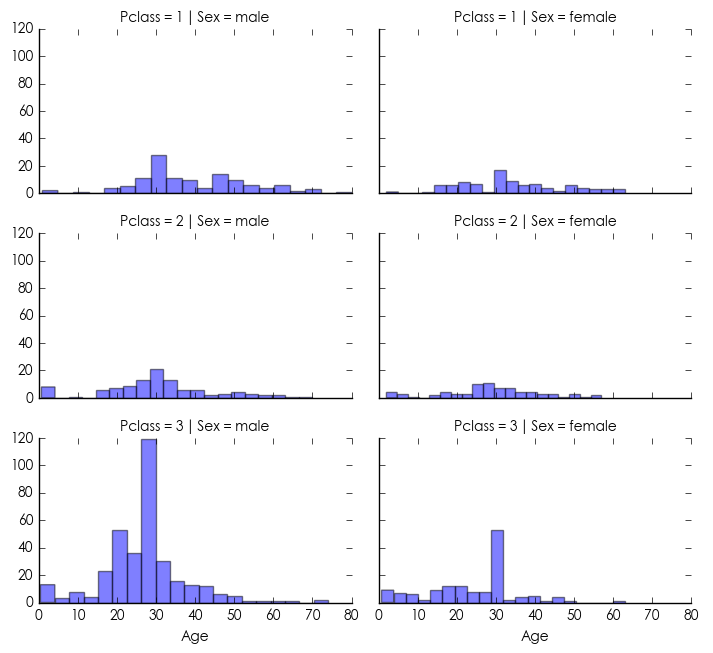

In [227]:
'''
0、空值处理

- 均值 +- 标准差，随机取
- 根据其他相关联特征猜测特征，median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1,
- 结合1，2
随机，随机噪声
'''

# 确定分布情况
grid = sns.FacetGrid(df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

combine = [features_train, features_test]
guess_ages = np.zeros((2,3))

# 针对年龄，
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            
            # 去除NUll值
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j + 1)]['Age'].dropna()
            

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            age_guess = guess_df.median()  # 中位数
    
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            # loc 横坐标/逻辑表达式， 纵坐标
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

features_train.head()

In [228]:
## 【Age】年龄特征 验证相关性

features_train['AgeBand'] = pd.cut( features_train['Age'], 5)  # 可更改类别数字大小
features_train[ ['AgeBand', 'Survived'] ].groupby('AgeBand', as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,AgeBand,Survived
0,"(-0.08, 16]",0.550000
3,"(48, 64]",0.434783
2,"(32, 48]",0.403226
1,"(16, 32]",0.344762
4,"(64, 80]",0.090909


In [229]:
# 分类特征 -> 数字

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
features_train.head()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,AgeBand
0,1,0,3,0,1,1,0,7.2500,S,1,"(16, 32]"
1,2,1,1,1,2,1,0,71.2833,C,3,"(32, 48]"
2,3,1,3,1,1,0,0,7.9250,S,2,"(16, 32]"
3,4,1,1,1,2,1,0,53.1000,S,3,"(32, 48]"
4,5,0,3,0,2,0,0,8.0500,S,1,"(32, 48]"


In [230]:
features_train = features_train.drop(['AgeBand'], axis=1)
combine = [features_train, features_test]
features_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,0,1,1,0,7.2500,S,1
1,2,1,1,1,2,1,0,71.2833,C,3
2,3,1,3,1,1,0,0,7.9250,S,2
3,4,1,1,1,2,1,0,53.1000,S,3
4,5,0,3,0,2,0,0,8.0500,S,1


家庭成员特征

In [231]:
# 验证 
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

features_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [232]:
# 验证
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

features_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

features_train = features_train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
features_test = features_test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [features_train, features_test]

features_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title,IsAlone
0,1,0,3,0,1,7.2500,S,1,0
1,2,1,1,1,2,71.2833,C,3,0
2,3,1,3,1,1,7.9250,S,2,1
3,4,1,1,1,2,53.1000,S,3,0
4,5,0,3,0,2,8.0500,S,1,1


In [233]:
features_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title,IsAlone
0,1,0,3,0,1,7.2500,S,1,0
1,2,1,1,1,2,71.2833,C,3,0
2,3,1,3,1,1,7.9250,S,2,1
3,4,1,1,1,2,53.1000,S,3,0
4,5,0,3,0,2,8.0500,S,1,1


In [234]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

features_train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)


,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [235]:
freq_port = features_train.Embarked.dropna().mode()[0]
freq_port
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
features_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [236]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

features_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title,IsAlone,Age*Class
0,1,0,3,0,1,7.2500,0,1,0,3
1,2,1,1,1,2,71.2833,1,3,0,2
2,3,1,3,1,1,7.9250,0,2,1,3
3,4,1,1,1,2,53.1000,0,3,0,2
4,5,0,3,0,2,8.0500,0,1,1,6


In [237]:
features_test['Fare'].fillna(features_test['Fare'].dropna().median(), inplace=True)
features_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [238]:
# 验证FareBand, 删除
features_train['FareBand'] = pd.qcut(features_train['Fare'], 4)
features_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

features_train = features_train.drop(['FareBand'], axis=1)
combine = [features_train, features_test]
    
features_train.head(10)


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title,IsAlone,Age*Class
0,1,0,3,0,1,0,0,1,0,3
1,2,1,1,1,2,3,1,3,0,2
2,3,1,3,1,1,1,0,2,1,3
3,4,1,1,1,2,3,0,3,0,2
4,5,0,3,0,2,1,0,1,1,6
5,6,0,3,0,1,1,2,1,1,3
6,7,0,1,0,3,3,0,1,1,3
7,8,0,3,0,0,2,0,4,0,0
8,9,1,3,1,1,1,0,3,0,3
9,10,1,2,1,0,2,1,3,0,0


In [242]:
features_train_new = features_train
labels_train_new = labels_train

In [244]:
print features_train_new.loc[1, 'Sex'] # loc取值
print features_train_new.iloc[1] # iloc取值
print features_train_new.shape
print features_test.shape
print features_train.columns, features_test.columns

1
PassengerId    2
Survived       1
Pclass         1
Sex            1
Age            2
Fare           3
Embarked       1
title          3
IsAlone        0
Age*Class      2
Name: 1, dtype: int64
(891, 10)
(418, 9)
Index([u'PassengerId', u'Survived', u'Pclass', u'Sex', u'Age', u'Fare',
       u'Embarked', u'title', u'IsAlone', u'Age*Class'],
      dtype='object') Index([u'PassengerId', u'Pclass', u'Sex', u'Age', u'Fare', u'Embarked',
       u'title', u'IsAlone', u'Age*Class'],
      dtype='object')


In [246]:
# 1.3.1 DicVectorizer方法
# from sklearn.feature_extraction import DictVectorizer
# vec = DictVectorizer(sparse = False)
# features_train = vec.fit_transform(features_train.to_dict(orient = 'record'))
# features_test = vec.fit_transform(features_test.to_dict(orient = 'record'))
# print (vec.feature_names_)
# print features_train

# 1.3.2 存在非数字类别的数据，Get_dummies方法，独热编码, 为什么One hot 而不是 每个分一个值【待】

features_train_new = pd.get_dummies(features_train_new)
features_test = pd.get_dummies(features_test)

# 因为训练集和测试集数据不同，独热编码后测试集有缺失，全填为0
missing_cols = set(features_train_new.columns) - set(features_test.columns)
for c in missing_cols:
    features_test[c] = 0
    
# features_test = features_test[features_train_new.columns]

# 1.3.3 因为只有两个类，replace

# features_train.loc[:,'Sex'] = features_train['Sex'].replace(['male','female'], [0, 1])
# features_test.loc[:,'Sex'] = features_test['Sex'].replace(['male','female'], [0, 1])

features_train_new = features_train.drop( ['Survived'], axis=1)
print features_test.shape

(418, 9)


In [253]:
delet = ['PassengerId']
features_train_new = features_train_new.drop(delet, axis=1)
features_test = features_test.drop(delet, axis=1)

In [284]:
print features_train_new.head()

   Pclass  Sex  Age  Fare  Embarked  title  IsAlone  Age*Class
0       3    0    1     0         0      1        0          3
1       1    1    2     3         1      3        0          2
2       3    1    1     1         0      2        1          3
3       1    1    2     3         0      3        0          2
4       3    0    2     1         0      1        1          6


In [259]:
# # 1.4 混洗，切分数据
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(features_train_new, labels_train_new, test_size = 0.2, random_state = 42)
# print X_train.shape[0]
# print X_test.shape[0]
# print X_train.head(), X_test.head(), y_train.head()

712
179
     Pclass  Sex  Age  Fare  Embarked  title  IsAlone  Age*Class
331       1    0    2     2         0      1        1          2
733       2    0    1     1         0      1        1          2
382       3    0    1     1         0      1        1          3
704       3    0    1     0         0      1        0          3
813       3    1    0     3         0      2        0          0      Pclass  Sex  Age  Fare  Embarked  title  IsAlone  Age*Class
709       3    0    1     2         1      4        0          3
439       2    0    1     1         0      1        1          2
840       3    0    1     1         0      1        1          3
720       2    1    0     3         0      2        0          0
39        3    1    0     1         1      2        0          0 331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64


# 模型训练

In [296]:

'''
2、确定算法，训练预测， enter
   0、初始模型评估：可用算法：决策树，随机森林，SVM，逻辑回归，KNN, 朴素贝叶斯
   1、训练中，网格搜索调参，寻找最符合训练集的参数

'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer, accuracy_score  #F1值 新建打分对象

## 2.0初始模型评估

# TODO：初始化模型
clf_A = SVC(random_state=42)
clf_B = LogisticRegression(random_state=42)
clf_C = RandomForestClassifier(random_state=42)
clf_D = DecisionTreeClassifier(random_state=42)


# 收集学习器的结果
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
# for clf in [clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    clf.fit(features_train_new, labels_train_new)  # 尽可能多的数据
    pred_y_test = clf.predict(features_train_new)
    results[clf_name] = accuracy_score(pred_y_test, labels_train_new)

print results

{'LogisticRegression': 0.80359147025813693, 'DecisionTreeClassifier': 0.86980920314253651, 'SVC': 0.83950617283950613, 'RandomForestClassifier': 0.86644219977553316}


In [299]:
# 2.1 网格搜索，枚举参数, Decison Tree
from sklearn.model_selection import GridSearchCV


# 2.1.1 初始化分类器
# clf = DecisionTreeClassifier(random_state = 42)

# # # 2.1.2 希望调节的参数列表
# parameters = {'min_samples_split':range(2,8), 'max_depth':range(10,101,10)}
    
# # 2.1.3 创建打分对象
# scorer = make_scorer(accuracy_score)

# # 2.1.4 分类器上使用网格搜索
# grid_clf = GridSearchCV(clf, parameters, scoring= scorer)

# # 2.1.5 训练
# grid_clf.fit(features_train_new, labels_train_new)

# # 2.1.6 最佳拟合分类器
# best_clf = grid_clf.best_estimator_
# pred_y_test = best_clf.predict(features_train_new)


# # Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 42)
parameters = {'min_samples_split':range(2,5), 'max_depth':range(10,101,10)}
scorer = make_scorer(accuracy_score)
grid_clf = GridSearchCV(clf, parameters, scoring=scorer)
grid_clf.fit(features_train_new, labels_train_new)
best_clf = grid_clf.best_estimator_
pred_y_test = best_clf.predict(features_train_new)

# 线性SVM
# from sklearn.svm import SVC
# clf = SVC(random_state = 42)
# parameters = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}   
# scorer = make_scorer(accuracy_score)
# grid_clf = GridSearchCV(clf, parameters, scoring=scorer)
# grid_clf.fit(X_train, y_train)
# best_clf = grid_clf.best_estimator_
# pred_y_test = best_clf.predict(X_test)

# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=42)
# # parameters = {
# # scorer = make_scorer(accuracy_score)
# clf.fit(X_train,y_train)
# pred_y_test = clf.predict(X_test)


# 确定评分标准

In [300]:
print accuracy_score(pred_y_test, labels_train_new)

pred = best_clf.predict(features_test)

0.863075196409


# 导出结果

In [302]:
df3 = pd.DataFrame(pred)
df3.index = df2['PassengerId']
df3.rename(columns={df3.columns[0]:'Survived'}, inplace=True)
df3.to_csv('predict.csv')